In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import os
# Set plot parameters
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 0.5


In [2]:
def process_one_file(cent_path, dist_path):
    df_cent = pd.read_csv(cent_path, header=0)
    df_dist = pd.read_csv(dist_path, header=0)

    # Find iteration of convergence
    df_cent["Converged"] = df_cent["Converged"].astype(bool)
    iter_of_convergence_cent = df_cent[df_cent["Converged"] == True]["Iter"].iloc[0]

    a = df_dist[df_dist["Node"] != "Overall"].groupby("Iter").sum()["NumConvergedCycles"].reset_index()
    iter_of_convergence_dist = a[a["NumConvergedCycles"] == 100]["Iter"].iloc[0]

    # Restrict plot
    iter_limit = max(iter_of_convergence_cent + 50, iter_of_convergence_dist + 50)
    df_cent = df_cent[df_cent["Iter"] <= iter_limit]
    df_dist = df_dist[df_dist["Iter"] <= iter_limit]
    return df_cent, df_dist

    fix, ax = plt.subplots()
    """ax.set_xlim(xmin=0)
    ax.set_ylim(ymin=0)"""
    #df_cent.plot("Iter", "TrainAUC", ax=ax)
    df_cent.plot("Iter", "TestAUC", ax=ax)
    #ax.set_title("Cent plot")

    """
    fix2, ax2 = plt.subplots()
    df.plot("Iter", "TestLoss", ax=ax2)
    df.plot("Iter", "TrainLoss", ax=ax2)
    """
    fig2, ax2 = plt.subplots()
    """ax2.set_xlim(xmin=0)
    ax2.set_ylim(ymin=0)"""
    df_dist.groupby(["Iter", "Node"]).mean()["TestAUC"].unstack().plot(ax=ax2, legend=False)
    ax2.set_title("Node-wise dist plot")

    fig3, ax3 = plt.subplots()
    """ax3.set_xlim(xmin=0)
    ax3.set_ylim(ymin=0)"""
    # df_dist.groupby("Iter").mean()[["TrainAUC", "TestAUC"]].plot(ax=ax3, legend=True)
    df_dist[df_dist["Node"] == "Overall"].groupby("Iter").mean()[["TestAUC"]].plot(ax=ax, style="r--", legend=True)
    ax.legend(["Centralized Setting", "Distributed Setting"])
    ax.set_ylabel("Test AUC")
    #ax3.set_title("Dist plot")

def process_many_files(cent_paths, dist_paths):
    cent_df, dist_df = None, None
    for i in range(len(cent_paths)):
        cent_path = cent_paths[i]
        dist_path = dist_paths[i]
        df_cent = pd.read_csv(cent_path, header=0)
        df_dist = pd.read_csv(dist_path, header=0)

        # Find iteration of convergence
        df_cent["Converged"] = df_cent["Converged"].astype(bool)
        iter_of_convergence_cent = df_cent[df_cent["Converged"] == True]["Iter"].iloc[0]

        a = df_dist[df_dist["Node"] != "Overall"].groupby("Iter").sum()["NumConvergedCycles"].reset_index()
        iter_of_convergence_dist = a[a["NumConvergedCycles"] == 100]["Iter"].iloc[0]
        print(iter_of_convergence_cent, iter_of_convergence_dist)
        
        
        # Restrict plot
        iter_limit = max(iter_of_convergence_cent + 50, iter_of_convergence_dist + 50)
        df_cent = df_cent[df_cent["Iter"] <= iter_limit]
        df_dist = df_dist[df_dist["Iter"] <= iter_limit]
        df_dist = df_dist[df_dist["Node"] == "Overall"]
        
        print(df_cent.iloc[-1]["TestAUC"]*100, df_dist.iloc[-1]["TestAUC"]*100)
        
        if cent_df is None:
            cent_df = df_cent
            dist_df = df_dist
        else:
            df_cent = df_cent[["Iter", "TestAUC", "TrainAUC"]]
            df_cent.columns = ["Iter", "TestAUC_{}".format(i+1), "TrainAUC_{}".format(i+1)]
            cent_df = cent_df.merge(df_cent, how="left", on="Iter")
            
            df_dist = df_dist[["Iter", "TestAUC", "TrainAUC"]]
            df_dist.columns = ["Iter", "TestAUC_{}".format(i+1), "TrainAUC_{}".format(i+1)]
            dist_df = dist_df.merge(df_dist, how="left", on="Iter")
    return cent_df, dist_df
    



In [3]:
def get_feature_importances(X, y):
    from sklearn.datasets import make_classification
    from sklearn.ensemble import ExtraTreesClassifier

    # Build a forest and compute the feature importances
    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    #     for f in range(X.shape[1]):
    #         print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    return importances

In [4]:
dataset_dir = "../data/arcene/feature_split_1/"

all_data = pd.read_csv(os.path.join(dataset_dir, "arcene_train_binary.csv"))
all_data = all_data.as_matrix()
X, y = data[:, 1:],  data[:, 0].reshape(-1,1)
all_features_importances = get_feature_importances(X,y)

# for i in range(2):
#     data = pd.read_csv(os.path.join(dataset_dir, "arcene_train_{}.csv".format(i)))
#     data = data.as_matrix()
#     X, y = data[:, 1:],  data[:, 0].reshape(-1,1)
all_features_importances    

C:\Users\Nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


NameError: name 'data' is not defined

18 68
53.70666700388017 55.764444695669866
18 55
53.70666700388017 59.79555575861719
18 92
53.70666700388017 58.435555525736994


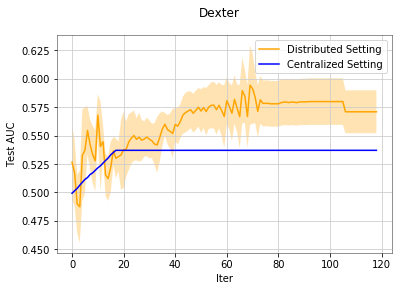

In [5]:
def plot_with_mean_std(df_cent, df_dist, title):
    df_dist["TrainAUC_mean"] = df_dist[["TrainAUC", "TrainAUC_2", "TrainAUC_3"]].mean(axis=1)
    df_dist["TrainAUC_std"] = df_dist[["TrainAUC", "TrainAUC_2", "TrainAUC_3"]].std(axis=1)

    df_dist["TestAUC_mean"] = df_dist[["TestAUC", "TestAUC_2", "TestAUC_3"]].mean(axis=1)
    df_dist["TestAUC_std"] = df_dist[["TestAUC", "TestAUC_2", "TestAUC_3"]].std(axis=1)

    fig, ax = plt.subplots()
    df_dist.plot("Iter", "TestAUC_mean", ax=ax, color='orange')
    ax.fill_between(df_dist["Iter"], df_dist["TestAUC_mean"] + df_dist["TestAUC_std"], df_dist["TestAUC_mean"] - df_dist["TestAUC_std"], 
                    facecolor='orange', alpha=0.3)
    
    
    
    df_cent["TrainAUC_mean"] = df_cent[["TrainAUC", "TrainAUC_2", "TrainAUC_3"]].mean(axis=1)
    df_cent["TrainAUC_std"] = df_cent[["TrainAUC", "TrainAUC_2", "TrainAUC_3"]].std(axis=1)

    df_cent["TestAUC_mean"] = df_cent[["TestAUC", "TestAUC_2", "TestAUC_3"]].mean(axis=1)
    df_cent["TestAUC_std"] = df_cent[["TestAUC", "TestAUC_2", "TestAUC_3"]].std(axis=1)


    df_cent.plot("Iter", "TestAUC_mean", ax=ax, color = "blue")
    ax.fill_between(df_cent["Iter"], df_cent["TestAUC_mean"] + df_cent["TestAUC_std"], df_cent["TestAUC_mean"] - df_cent["TestAUC_std"], 
                    facecolor='blue', alpha=0.3)
    ax.legend(["Distributed Setting", "Centralized Setting"])
    ax.set_ylabel("Test AUC")
    ax.set_xlabel("Iter")
    fig.suptitle(title)
    

    
cent_paths = ["../data/dexter/feature_split_{}/run_0_numhidden_500_lr_0.001_networksize_1_randomseed_12345/vpnn_results_temp_1.csv".format(
i) for i in range(1,4)]

dist_paths = ["../data/dexter/feature_split_{}/run_0_numhidden_500_lr_0.001_networksize_10_randomseed_12345/vpnn_results_temp_10.csv".format(
i) for i in range(1,4)]


dexter_cent, dexter_dist = process_many_files(cent_paths, dist_paths)
plot_with_mean_std(dexter_cent, dexter_dist, "Dexter")


30 61
96.87000258492327 95.75200272551916
30 55
96.87000258492327 95.60320271995236
30 55
96.87000258492327 95.72440300862736


<IPython.core.display.Javascript object>


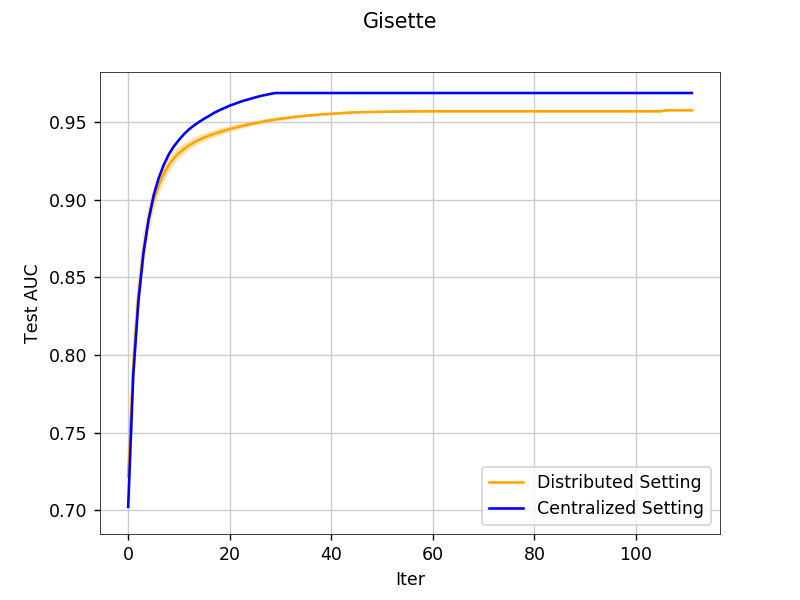

In [23]:
cent_paths = ["../data/gisette/feature_split_{}/run_0_numhidden_200_lr_1.0E-5_networksize_1_randomseed_12345/vpnn_results_temp_1.csv".format(
i) for i in [1,1,1]]

dist_paths = ["../data/gisette/feature_split_{}/run_0_numhidden_200_lr_1.0E-5_networksize_10_randomseed_12345/vpnn_results_temp_10.csv".format(
i) for i in range(1,4)]


gisette_cent, gisette_dist = process_many_files(cent_paths, dist_paths)
plot_with_mean_std(gisette_cent, gisette_dist, title="Gisette")

27 50
61.45333377950506 49.54666659954337
27 70
61.45333377950506 56.19111161676127
27 50
61.45333377950506 53.73000026135366


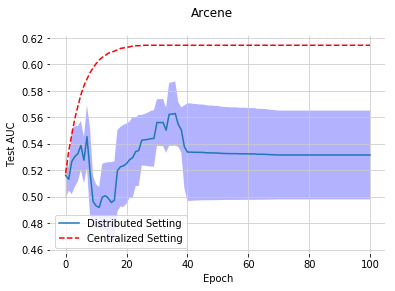

In [12]:
cent_paths = ["../data/madelon/feature_split_{}/run_0_numhidden_100_lr_0.001_networksize_1_randomseed_12345/vpnn_results_temp_1.csv".format(
i) for i in [1,1,1]]

dist_paths = ["../data/madelon/feature_split_{}/run_0_numhidden_100_lr_0.001_networksize_10_randomseed_12345/vpnn_results_temp_10.csv".format(
i) for i in range(1,4)]


gisette_cent, gisette_dist = process_many_files(cent_paths, dist_paths)
plot_with_mean_std(gisette_cent, gisette_dist, title="Madelon")

72 134
85.79545541146376 83.52272820223565
72 136
85.79545541146376 84.17207869011682
72 138
85.79545541146376 83.60389662096163


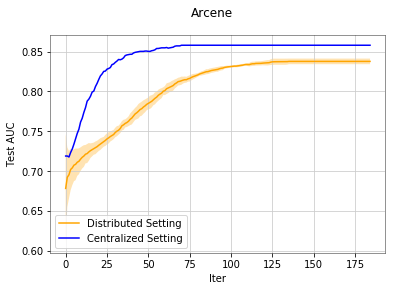

In [6]:
cent_paths = ["../data/arcene/feature_split_1/run_0_numhidden_100_lr_1.0E-4_networksize_1_randomseed_{}_lf_cross_entropy_haf_tanh_faf_tanh/vpnn_results_temp_1.csv".format(
i) for i in [41, 41, 41]]

dist_paths = ["../data/arcene/feature_split_{}/run_0_numhidden_100_lr_1.0E-4_networksize_10_randomseed_41_lf_cross_entropy_haf_tanh_faf_tanh/vpnn_results_temp_10.csv".format(
i) for i in [1,2,3]]


gisette_cent, gisette_dist = process_many_files(cent_paths, dist_paths)
plot_with_mean_std(gisette_cent, gisette_dist, title="Arcene")

28 89
89.10039804924033 86.37475730675071
28 89
89.10039804924033 86.37475730675071
28 89
89.10039804924033 86.37475730675071


<IPython.core.display.Javascript object>


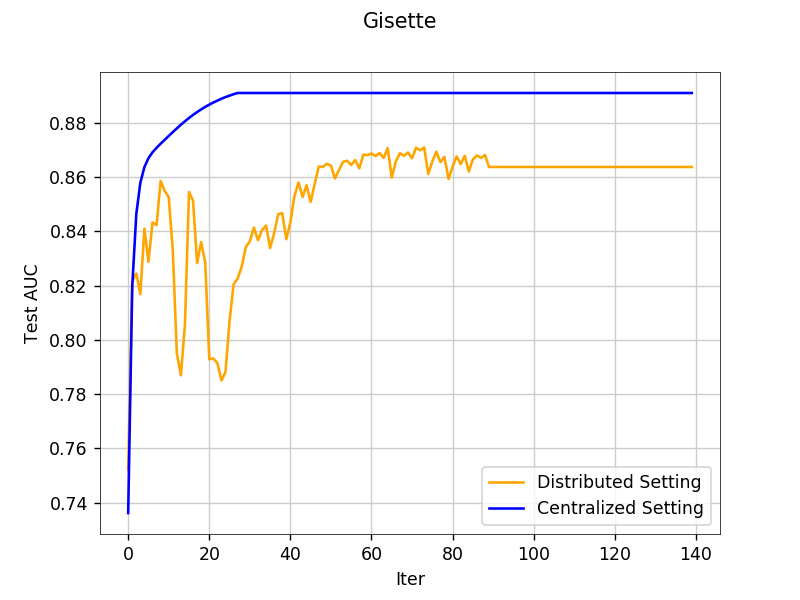

In [39]:
cent_paths = ["../data/adult/feature_split_{}/run_0_numhidden_50_lr_1.0E-4_networksize_1_randomseed_40/vpnn_results_temp_1.csv".format(
i) for i in [1,1,1]]

dist_paths = ["../data/adult/feature_split_{}/run_0_numhidden_50_lr_1.0E-4_networksize_10_randomseed_40/vpnn_results_temp_10.csv".format(
i) for i in [1,1,1]]


gisette_cent, gisette_dist = process_many_files(cent_paths, dist_paths)
plot_with_mean_std(gisette_cent, gisette_dist, title="Gisette")

Text(0,0.5,'Test AUC')

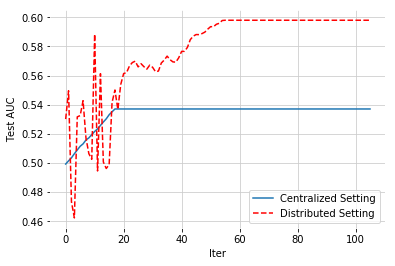

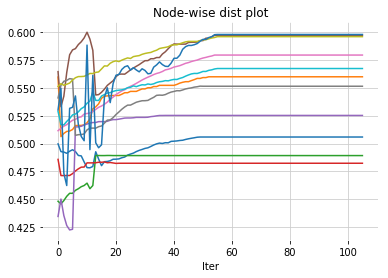

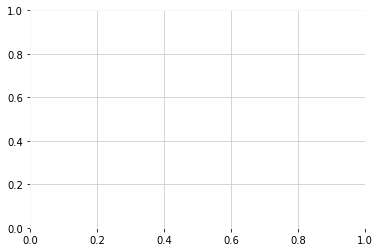

In [18]:
# Set plot parameters
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"


df_cent = pd.read_csv("../data/dexter/feature_split_2/run_0_numhidden_500_lr_0.001_networksize_1_randomseed_12345/vpnn_results_temp_1.csv", header=0)
df_dist = pd.read_csv("../data/dexter/feature_split_2/run_0_numhidden_500_lr_0.001_networksize_10_randomseed_12345/vpnn_results_temp_10.csv", header=0)

# Find iteration of convergence
df_cent["Converged"] = df_cent["Converged"].astype(bool)
iter_of_convergence_cent = df_cent[df_cent["Converged"] == True]["Iter"].iloc[0]

a = df_dist[df_dist["Node"] != "Overall"].groupby("Iter").sum()["NumConvergedCycles"].reset_index()
iter_of_convergence_dist = a[a["NumConvergedCycles"] == 100]["Iter"].iloc[0]

# Restrict plot
iter_limit = max(iter_of_convergence_cent + 50, iter_of_convergence_dist + 50)
df_cent = df_cent[df_cent["Iter"] <= iter_limit]
df_dist = df_dist[df_dist["Iter"] <= iter_limit]


fix, ax = plt.subplots()
"""ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)"""
#df_cent.plot("Iter", "TrainAUC", ax=ax)
df_cent.plot("Iter", "TestAUC", ax=ax)
#ax.set_title("Cent plot")

"""
fix2, ax2 = plt.subplots()
df.plot("Iter", "TestLoss", ax=ax2)
df.plot("Iter", "TrainLoss", ax=ax2)
"""
fig2, ax2 = plt.subplots()
"""ax2.set_xlim(xmin=0)
ax2.set_ylim(ymin=0)"""
df_dist.groupby(["Iter", "Node"]).mean()["TestAUC"].unstack().plot(ax=ax2, legend=False)
ax2.set_title("Node-wise dist plot")

fig3, ax3 = plt.subplots()
"""ax3.set_xlim(xmin=0)
ax3.set_ylim(ymin=0)"""
# df_dist.groupby("Iter").mean()[["TrainAUC", "TestAUC"]].plot(ax=ax3, legend=True)
df_dist[df_dist["Node"] == "Overall"].groupby("Iter").mean()[["TestAUC"]].plot(ax=ax, style="r--", legend=True)
ax.legend(["Centralized Setting", "Distributed Setting"])
ax.set_ylabel("Test AUC")
#ax3.set_title("Dist plot")

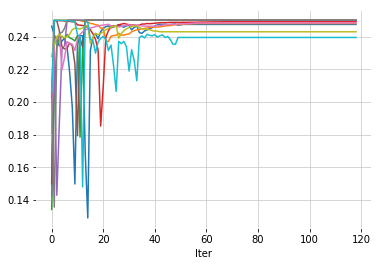

In [17]:
fig, ax = plt.subplots()
df_dist[df_dist["Node"] != "Overall"].groupby(["Iter", "Node"]).mean()["TestLoss"].unstack().plot(ax=ax, legend=False)
    

C:\Users\Nitin\Anaconda3\lib\site-packages\pandas\core\ops.py:1164: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


TypeError: invalid type comparison

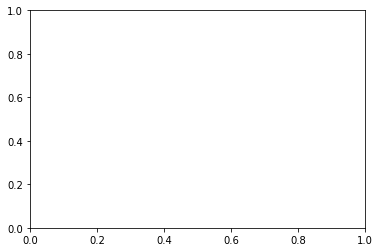

In [5]:
def plot_results(cent_path, dist_path, legend):
    fig, ax = plt.subplots()
    df_cent = pd.read_csv(cent_path, header=0) 
    df_dist = pd.read_csv(dist_path, header=0) 
    
    df_cent = df_cent[["Iter", "TestLoss", "TestAccuracy"]]
    df_cent.columns = ["Iter", "TestLossCent", "TestAccuracyCent"]
    
    df_dist_new = df_dist[df_dist["Node"] == "Overall"]
    df_dist_new = df_dist_new[["Iter", "TestLoss", "TestAccuracy"]]
    df_dist_new.columns = ["Iter", "TestLossDist", "TestAccuracyDist"]
    
    df = df_cent.merge(df_dist_new, on="Iter", how="left")
    df.plot("Iter", "TestLossDist", ax=ax,legend=legend)
    df.plot("Iter", "TestLossCent", ax=ax, legend=legend)
    
    fig, ax = plt.subplots()
    df.plot("Iter", "TestAccuracyDist", ax=ax, legend=legend)
    df.plot("Iter", "TestAccuracyCent", ax=ax, legend=legend)
    
    fig, ax = plt.subplots()
    df_dist[df_dist["Node"] != "Overall"].groupby(["Iter", "Node"]).mean()["TestLoss"].unstack().plot(ax=ax, legend=False)
    
    
cent_path = "../data/arcene/run1/vpnn_results_temp_1.csv"
dist_path = "../data/arcene/run1/vpnn_results_temp_2.csv"
plot_results(cent_path,dist_path, True)

In [3]:
dist_path = "../data/arcene/run1/vpnn_results_temp.csv"
df = pd.read_csv(dist_path)
df

,Iter,Node,TrainLoss,TrainAUC,TestLoss,TestAUC,MeanProbabilitiesTrain,MeanProbabilitiesTest
0,0,0,35.832748,0.587681,11.586296,0.659341,0.9200,0.9427
1,0,1,31.012426,0.580767,9.896991,0.648352,0.8431,0.8708
2,0,Overall,33.422600,0.622879,10.741600,0.714286,0.8815,0.9067
3,0,0,37.867813,0.579510,11.968268,0.626374,0.9438,0.9585
4,0,1,36.775276,0.549340,11.359272,0.615385,0.9238,0.9357
5,0,Overall,37.321500,0.603394,11.663800,0.648352,0.9338,0.9471
6,1,0,39.032249,0.573224,12.184566,0.604396,0.9568,0.9673
7,1,1,38.650967,0.539283,11.830408,0.582418,0.9473,0.9547
8,1,Overall,38.841600,0.594595,12.007500,0.626374,0.9520,0.9610
9,1,0,39.732788,0.565053,12.316339,0.604396,0.9645,0.9726


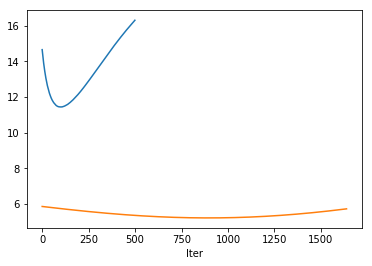

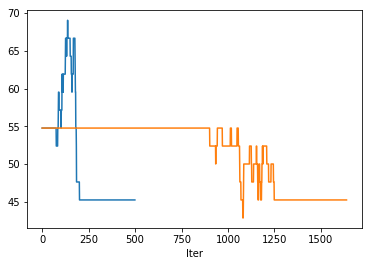

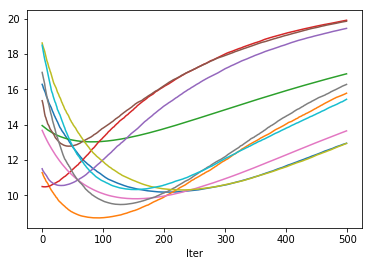

In [29]:
cent_path = "../dl4j-examples/dl4j-examples/data/sonar/run0/vpnn_results_1_temp.csv"
dist_path = "../dl4j-examples/dl4j-examples/data/sonar/run0/vpnn_results_10_temp.csv"
plot_results(cent_path,dist_path)

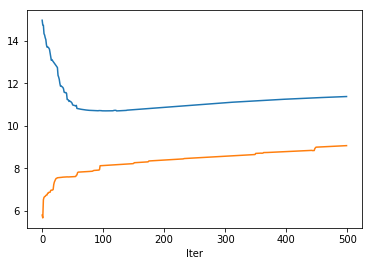

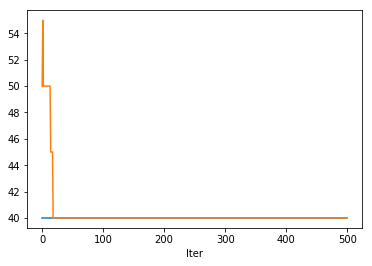

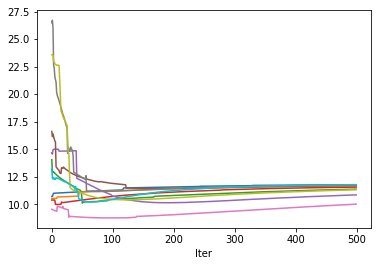

In [28]:
cent_path = "../dl4j-examples/dl4j-examples/data/arcene/run0/vpnn_results_1_temp.csv"
dist_path = "../dl4j-examples/dl4j-examples/data/arcene/run0/vpnn_results_10_temp.csv"
plot_results(cent_path,dist_path)

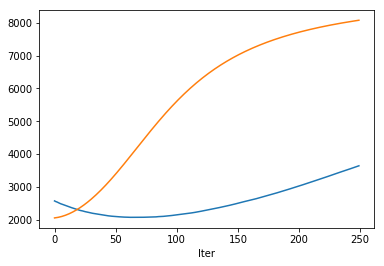

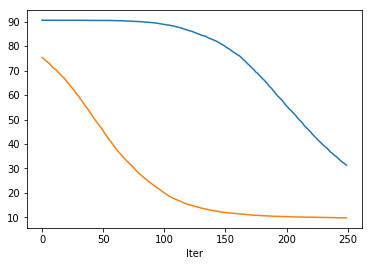

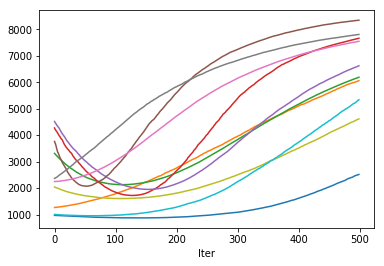

In [27]:
cent_path = "../dl4j-examples/dl4j-examples/data/mnist/run0/vpnn_results_1_temp.csv"
dist_path = "../dl4j-examples/dl4j-examples/data/mnist/run0/vpnn_results_10_temp.csv"
plot_results(cent_path,dist_path)

In [ ]:
df_vp = pd.read_csv("../dl4j-examples/dl4j-examples/data/mnist/run0/vpnn_results_10_temp.csv", header=0) 
df_vp_disp = df_vp[df_vp["Node"] == "Overall"]
df_vp_disp.plot("Iter", "TestLoss", legend=False)

In [ ]:
#df_vp = pd.read_csv("../dl4j-examples/dl4j-examples/data/synthetic/run0/vpnn_results.csv", header=0)
#df_vp = pd.read_csv("../dl4j-examples/dl4j-examples/data/mnist/run0/vpnn_results_dist_10nodes_2layers.csv", header=0) 

df_vp = pd.read_csv("../dl4j-examples/dl4j-examples/data/mnist/run0/vpnn_results_10_temp.csv", header=0) 
#df_vp.groupby(by=["Iter"]).mean()
fig, ax = plt.subplots(1,2, figsize=(10,5))
#df_vp[df_vp["Node"] == 'Overall'].drop("Node", axis=1).plot("Iter", "TrainAccuracy", ax=ax[0])
#df_vp[df_vp["Node"] == 'Overall'].drop("Node", axis=1).plot("Iter", "TrainLoss", ax=ax[0])
df_vp[df_vp["Node"] == 'Overall'].drop("Node", axis=1).plot("Iter", "TestLoss", ax=ax[0], legend=False)
df_vp[df_vp["Node"] == "Overall"].drop("Node", axis=1).plot("Iter", "TestAccuracy", ax=ax[1], legend=False)
ax[0].set_ylabel('Loss')
ax[1].set_ylabel('Accuracy')
#df_vp[df_vp["Node"] == "Overall"].drop("Node", axis=1).plot("Iter", "TrainAccuracy", ax=ax[1])

In [ ]:
fig, ax = plt.subplots()
df_vp[df_vp["Node"] != "Overall"].groupby(["Iter", "Node"]).mean()["TestLoss"].unstack().plot(ax=ax)
ax.legend(loc='upper right')
ax.set_title("Loss per node")
ax.set_xlabel("Iter")
ax.set_ylabel("Loss")
#df_vp.groupby("Iter").sum().reset_index().plot("Iter","TrainLoss")

In [ ]:
df_cent = pd.read_csv("../dl4j-examples/dl4j-examples/data/convex/run0/vpnn_results_cent.csv", header=0) 
fig, ax = plt.subplots(1,2, figsize=(10,5))
df_cent.plot("Iter", "TrainAccuracy", ax=ax[0])
df_cent.plot("Iter", "TrainLoss", ax=ax[1])

In [ ]:
df_0.plot("Iter", "TrainLoss")
#df_1.plot("Iter", "TrainLoss")

In [ ]:
#ax = df2["TrainLoss"].plot(label="Distributed Train Loss", legend=True)
#ax = df2["TestLoss"].plot(label="Distributed Test Loss", legend=True)
for i in range(2):
    df3[df3["Node"] == i]["TrainLoss"].plot(label="Train Loss - Node{}".format(i), legend=True)
    #ax = df3["TestLoss"].plot(label="Centralized Test Loss", legend=True)
    #ax.set_ylabel("Squared Loss")
    #ax.set_title("Loss vs Iteration")

In [ ]:
df3["TrainLoss"]

In [ ]:
df2.groupby(by=["Iter"]).mean()

In [ ]:
df3["TestAccuracy"]